In [46]:
# Lab_03
# Topics
# 1. Lab_03: Digital Image Fundamentals

# Student Name: Khalid Nimri
# Student ID: 2140145

import matplotlib.pyplot as plt
import numpy as np
from skimage import io, color
import cv2
from PIL import Image
import skimage.exposure as exposure

In [47]:
# Exercise #8

a = [3, 5, 2, 0, 3, 1, -4]
b = [-2, 6, 1, 4, 2, 1, 2]

c = [ai for ai, bi in zip(a, b) if ai > bi]

d = [ai for ai, bi in zip(a, b) if ai <= bi]

print(c)
print(d)

[3, 2, 3]
[5, 0, 1, -4]


<Figure size 640x480 with 0 Axes>

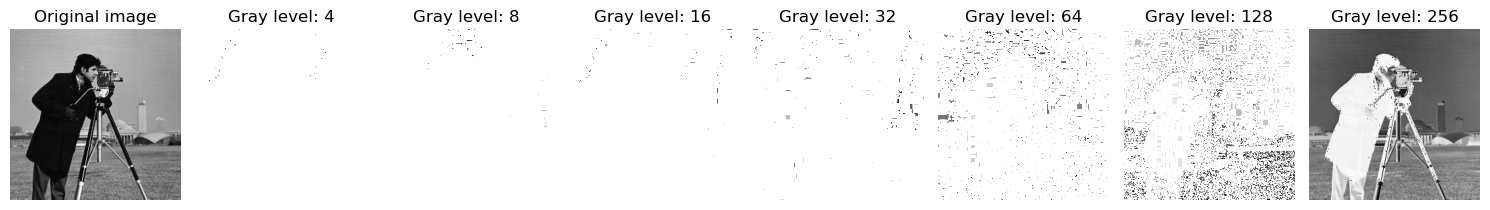

In [48]:
# Exercise #9
plt.clf()

image_path = '/Users/klnimri/Desktop/Lab_03/img/cameraman.jpg'
I = io.imread(image_path)

if I.shape[-1] == 3:
    I = color.rgb2gray(I)

gray_levels = [256, 128, 64, 32, 16, 8, 4, 2]

fig, axs = plt.subplots(1, len(gray_levels), figsize=(15, 5))

for i, gray_level in enumerate(gray_levels):
    quantized_image = (np.round(I * (gray_level - 1)) / (gray_level - 1)).astype(np.float32)
    axs[len(gray_levels) - i - 1].imshow(quantized_image, cmap='gray', vmin=0, vmax=1)
    axs[len(gray_levels) - i - 1].set_title(f'Gray level: {gray_level}')

axs = np.insert(axs, len(gray_levels), axs[0])
axs[len(gray_levels)].imshow(I, cmap='gray')
axs[len(gray_levels)].set_title('Original image')

for ax in axs:
    ax.axis('off')

plt.tight_layout()

plt.show()

<Figure size 640x480 with 0 Axes>

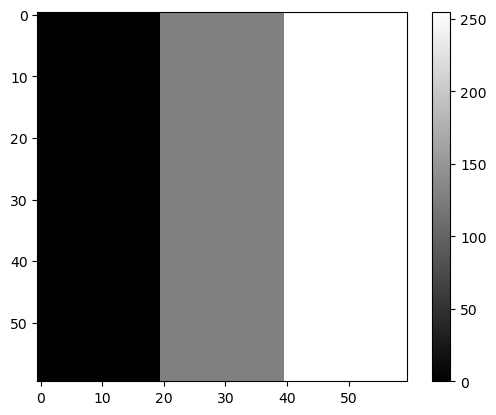

In [49]:
# Exercise #10
plt.clf()

B = 0
G = 128  
W = 255

X = np.zeros((60, 60), dtype=np.uint8)

for i in range(60):
    for j in range(20):
        X[i, j] = B
    for j in range(20, 40):
        X[i, j] = G
    for j in range(40, 60):
        X[i, j] = W

plt.figure()
plt.imshow(X, cmap='gray', vmin=0, vmax=255)  # Specify vmin and vmax for black and white display
plt.colorbar()
plt.imsave("/Users/klnimri/Desktop/Lab_03/img/intensity_levels.png", X, cmap='gray', format='png', vmin=0, vmax=255)

plt.show()

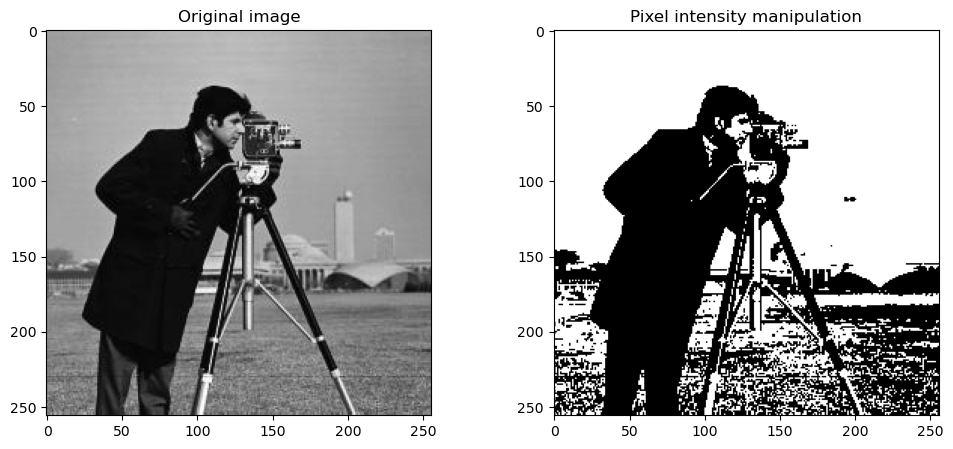

In [50]:
# Exercise #11
image_path = '/Users/klnimri/Desktop/Lab_03/img/cameraman.jpg'
I = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

I2 = np.where(I > 128, 255, 1).astype(np.uint8)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(I, cmap='gray')
axs[0].set_title('Original image')

axs[1].imshow(I2, cmap='gray')
axs[1].set_title('Pixel intensity manipulation')

plt.show()


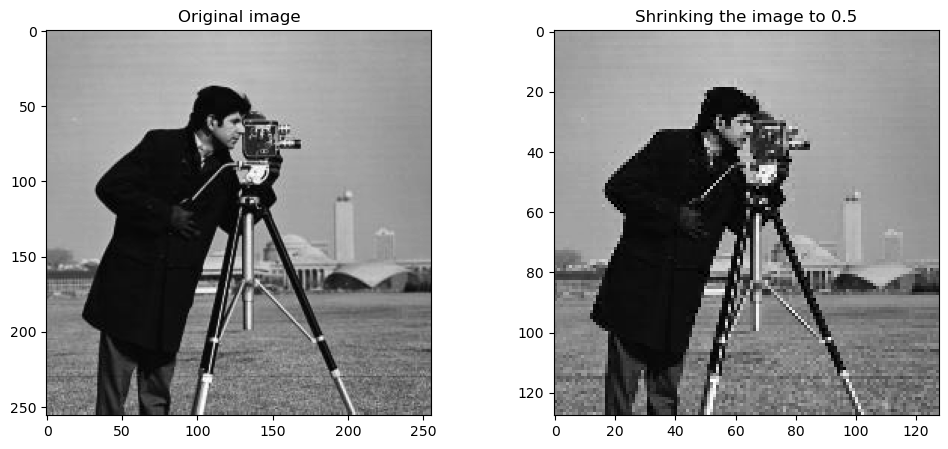

In [51]:
# Exercise #12
image_path = '/Users/klnimri/Desktop/Lab_03/img/cameraman.jpg'
I = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

m, n = I.shape
g = I[::2, ::2]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(I, cmap='gray')
axs[0].set_title('Original image')

axs[1].imshow(g, cmap='gray')
axs[1].set_title('Shrinking the image to 0.5')

plt.show()

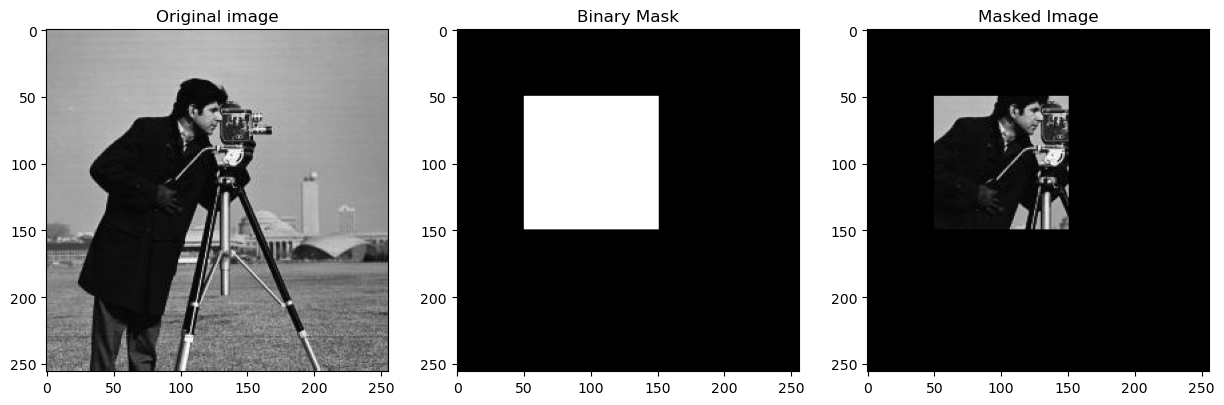

In [52]:
# Exercise #13
image_path = '/Users/klnimri/Desktop/Lab_03/img/cameraman.jpg'
A = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

mask = np.zeros_like(A, dtype=np.uint8)
mask[50:150, 50:151] = 255  # Adjusted the indices to match MATLAB's 1-based indexing

B = cv2.bitwise_and(A, mask)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(A, cmap='gray')
axs[0].set_title('Original image')

axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Binary Mask')

axs[2].imshow(B, cmap='gray')
axs[2].set_title('Masked Image')

plt.show()

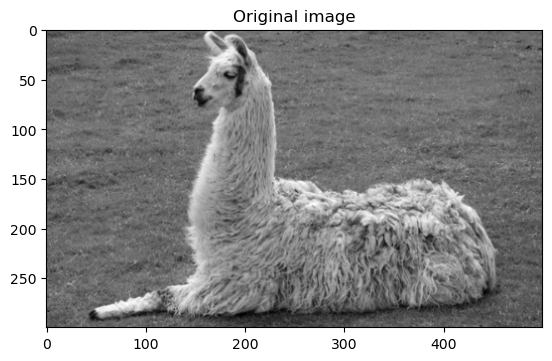

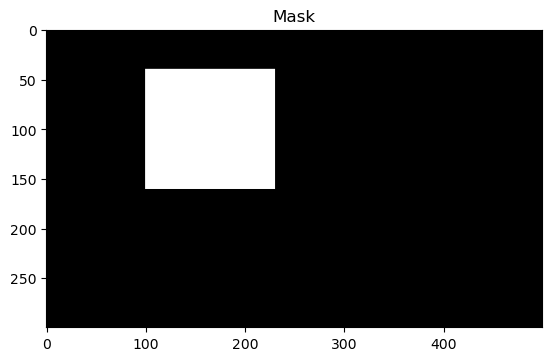

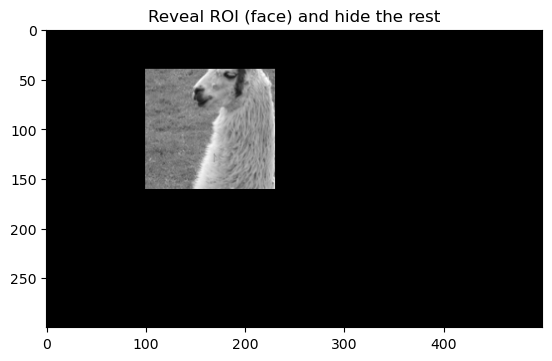

In [53]:
# Exercise #14
image_path = '/Users/klnimri/Desktop/Lab_03/img/llama.png'
img = cv2.imread(image_path)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (500, 300))

plt.imshow(img, cmap='gray')
plt.title('Original image')
plt.show()

rect = (100, 40, 130, 120)
mask = img.copy()
mask[:] = 0 
cv2.rectangle(mask, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), 255, -1)

plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.show()

ROI = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(ROI, cmap='gray')
plt.title('Reveal ROI (face) and hide the rest')
plt.show()

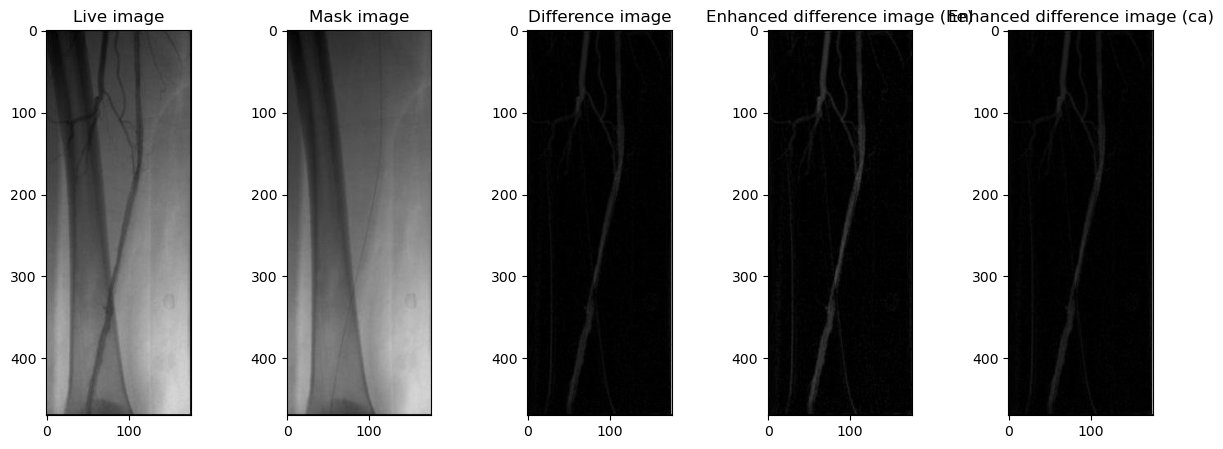

In [54]:
# Exercise #15
mask_img = Image.open('/Users/klnimri/Desktop/Lab_03/img/mask.jpg').convert('RGB')
live_img = Image.open('/Users/klnimri/Desktop/Lab_03/img/live.jpg').convert('RGB')

mask_img = np.array(mask_img) / 255.0
live_img = np.array(live_img) / 255.0
diff_img = np.abs(mask_img - live_img)

histeq_diff_img = exposure.equalize_adapthist(diff_img, clip_limit=0.005)

imadjust_diff_img = exposure.rescale_intensity(diff_img, in_range=(0, 1))

plt.figure(figsize=(15, 5))
plt.subplot(1, 5, 1), plt.imshow(live_img)
plt.title('Live image')
plt.subplot(1, 5, 2), plt.imshow(mask_img)
plt.title('Mask image')
plt.subplot(1, 5, 3), plt.imshow(diff_img, cmap='gray')
plt.title('Difference image')
plt.subplot(1, 5, 4), plt.imshow(histeq_diff_img, cmap='gray')
plt.title('Enhanced difference image (he)')
plt.subplot(1, 5, 5), plt.imshow(imadjust_diff_img, cmap='gray')
plt.title('Enhanced difference image (ca)')

Image.fromarray((diff_img * 255).astype(np.uint8)).save('Difference_image.jpg')
Image.fromarray((histeq_diff_img * 255).astype(np.uint8)).save('Enhanced_difference_image_histogram_equalization.jpg')
Image.fromarray((imadjust_diff_img * 255).astype(np.uint8)).save('Enhanced_difference_image_contrast_adjuststment.jpg')

plt.show()